Este cuaderno sirve para probar el framework como un cliente.

In [1]:
#--------------------------------- IMPORTACIONES
#-----------------------------------------------
import pandas as pd
from IPython.display import Image, display

from framework.datasource               import CSVDataSource
from framework.processor                import DataProcessor
from framework.cleaner                  import Cleaner, TypeOnlyCleaner
from framework.strategy.bar             import BarChartStrategy
from framework.strategy.line            import LineChartStrategy
from framework.strategy.boxplot         import BoxplotStrategy
from framework.strategy.correlograma    import CorrelogramaStrategy
from framework.strategy.histogram       import HistogramStrategy
from framework.strategy.scatter         import ScatterStrategy


In [2]:
#----------------------------------- IDataSource
#-----------------------------------------------
DATA_PATH = "datasets/madrid_2001_2018_calidad_aire.csv"

csv_source = CSVDataSource(DATA_PATH)
df = csv_source.load()

In [3]:
#-------------------------------- IDataProcessor
#-----------------------------------------------
processor = DataProcessor()

# tupla numero registros y columnas
print("Shape via processor:", processor.get_shape(df))
# diccionario columna y tipo dato
print("Dtypes via processor:", processor.get_dtypes(df))
# lista con columnas
print("Columns via processor:", processor.get_columns(df))

Shape via processor: (3808224, 19)
Dtypes via processor: {'date': 'object', 'BEN': 'float64', 'CH4': 'float64', 'CO': 'float64', 'EBE': 'float64', 'MXY': 'float64', 'NMHC': 'float64', 'NO': 'float64', 'NO_2': 'float64', 'NOx': 'float64', 'OXY': 'float64', 'O_3': 'float64', 'PM10': 'float64', 'PM25': 'float64', 'PXY': 'float64', 'SO_2': 'float64', 'TCH': 'float64', 'TOL': 'float64', 'station': 'int64'}
Columns via processor: ['date', 'BEN', 'CH4', 'CO', 'EBE', 'MXY', 'NMHC', 'NO', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10', 'PM25', 'PXY', 'SO_2', 'TCH', 'TOL', 'station']


In [4]:
# pasar `station` a categoría
caster = TypeOnlyCleaner(dtype_map={"station": "category"})
df2 = caster.clean(df)

# Compruebo
print(df2.dtypes["station"])          # category
print(df2.attrs["cleaning_log"])      # mensajes de conversión

category
["Columna 'station' convertida a tipo category."]


In [5]:
#-------------------------------------- ICleaner
#-----------------------------------------------
#copias para test
df_a = df2
df_b = df2
df_c = df2
df_d = df2

# cleaner por defecto: elimina columnas con mas del 70% nulos, imputa media y con Desconocido, elimina constantes y vacias, y convierte fechas
cleaner_default = Cleaner()
df_cleaned = cleaner_default.clean(df2)
print("\nDefault Cleaner -> shape:", df_cleaned.shape)
print("Log (primeras 5 entradas):")
for line in df_cleaned.attrs["cleaning_log"][:100]:
    print(" -", line)


Default Cleaner -> shape: (3808224, 9)
Log (primeras 5 entradas):
 - Columna 'date' convertida a datetime.
 - Columna 'BEN' eliminada (> 73% nulos).
 - Columna 'CH4' eliminada (> 100% nulos).
 - 'CO' imputada con media.
 - Columna 'EBE' eliminada (> 74% nulos).
 - Columna 'MXY' eliminada (> 92% nulos).
 - Columna 'NMHC' eliminada (> 72% nulos).
 - 'NO' imputada con media.
 - 'NO_2' imputada con media.
 - 'NOx' imputada con media.
 - Columna 'OXY' eliminada (> 92% nulos).
 - 'O_3' imputada con media.
 - 'PM10' imputada con media.
 - Columna 'PM25' eliminada (> 79% nulos).
 - Columna 'PXY' eliminada (> 92% nulos).
 - 'SO_2' imputada con media.
 - Columna 'TCH' eliminada (> 71% nulos).
 - Columna 'TOL' eliminada (> 73% nulos).


In [6]:
# strategy_numeric='drop': elimina columnas con mas del 70% nulos, elimina registros con numericos nulos e imputa con desconocido, elimina constantes y vacias, y convierte fechas
cleaner_drop_num = Cleaner(strategy_numeric="drop")
df_cleanA = cleaner_drop_num.clean(df_a)
print("\nstrategy_numeric='drop' -> shape:", df_cleanA.shape)
print("Log (primeras 5 entradas):")
for line in df_cleanA.attrs["cleaning_log"][:100]:
    print(" -", line)


strategy_numeric='drop' -> shape: (146924, 14)
Log (primeras 5 entradas):
 - Columna 'date' convertida a datetime.
 - Columna 'BEN' eliminada (> 73% nulos).
 - Columna 'CH4' eliminada (> 100% nulos).
 - Dropped 1157212 filas con nulos en 'CO'.
 - Columna 'EBE' eliminada (> 73% nulos).
 - Columna 'MXY' eliminada (> 88% nulos).
 - Dropped 1815336 filas con nulos en 'NMHC'.
 - Columna 'NO' eliminada (> 87% nulos).
 - Dropped 1277 filas con nulos en 'NO_2'.
 - Dropped 99308 filas con nulos en 'NOx'.
 - Dropped 462372 filas con nulos en 'OXY'.
 - Dropped 1292 filas con nulos en 'O_3'.
 - Dropped 518 filas con nulos en 'PM10'.
 - Dropped 123203 filas con nulos en 'PM25'.
 - Dropped 61 filas con nulos en 'PXY'.
 - Dropped 32 filas con nulos en 'SO_2'.
 - Dropped 364 filas con nulos en 'TCH'.
 - Dropped 325 filas con nulos en 'TOL'.


In [7]:
# strategy_categorical='drop': elimina columnas con mas del 70% nulos, imputa media y elimina regostrso categoricos con nulos, elimina constantes y vacias, y convierte fechas
cleaner_drop_cat = Cleaner(strategy_categorical="drop")
df_cleanB = cleaner_drop_cat.clean(df_b)
print("\nstrategy_categorical='drop' -> shape:", df_cleanB.shape)
print("Log (primeras 5 entradas):")
for line in df_cleanB.attrs["cleaning_log"][:100]:
    print(" -", line)


strategy_categorical='drop' -> shape: (3808224, 9)
Log (primeras 5 entradas):
 - Columna 'date' convertida a datetime.
 - Columna 'BEN' eliminada (> 73% nulos).
 - Columna 'CH4' eliminada (> 100% nulos).
 - 'CO' imputada con media.
 - Columna 'EBE' eliminada (> 74% nulos).
 - Columna 'MXY' eliminada (> 92% nulos).
 - Columna 'NMHC' eliminada (> 72% nulos).
 - 'NO' imputada con media.
 - 'NO_2' imputada con media.
 - 'NOx' imputada con media.
 - Columna 'OXY' eliminada (> 92% nulos).
 - 'O_3' imputada con media.
 - 'PM10' imputada con media.
 - Columna 'PM25' eliminada (> 79% nulos).
 - Columna 'PXY' eliminada (> 92% nulos).
 - 'SO_2' imputada con media.
 - Columna 'TCH' eliminada (> 71% nulos).
 - Columna 'TOL' eliminada (> 73% nulos).


In [8]:
# drop_empty_const=False: elimina columnas con mas del 70% nulos, imputa media y con Desconocido, NO elimina constantes y vacias, y convierte fechas
cleaner_no_drop = Cleaner(drop_empty_const=False)
df_cleanC = cleaner_no_drop.clean(df_c)
print("\ndrop_empty_const=False -> shape:", df_cleanC.shape)
print("Log (primeras 5 entradas):")
for line in df_cleanC.attrs["cleaning_log"][:100]:
    print(" -", line)


drop_empty_const=False -> shape: (3808224, 9)
Log (primeras 5 entradas):
 - Columna 'date' convertida a datetime.
 - Columna 'BEN' eliminada (> 73% nulos).
 - Columna 'CH4' eliminada (> 100% nulos).
 - 'CO' imputada con media.
 - Columna 'EBE' eliminada (> 74% nulos).
 - Columna 'MXY' eliminada (> 92% nulos).
 - Columna 'NMHC' eliminada (> 72% nulos).
 - 'NO' imputada con media.
 - 'NO_2' imputada con media.
 - 'NOx' imputada con media.
 - Columna 'OXY' eliminada (> 92% nulos).
 - 'O_3' imputada con media.
 - 'PM10' imputada con media.
 - Columna 'PM25' eliminada (> 79% nulos).
 - Columna 'PXY' eliminada (> 92% nulos).
 - 'SO_2' imputada con media.
 - Columna 'TCH' eliminada (> 71% nulos).
 - Columna 'TOL' eliminada (> 73% nulos).


In [9]:
# Umbral de nulos más estricto (null_threshold=0.3): elimina columnas con mas del 30% nulos, imputa media y con Desconocido, elimina constantes y vacias, y convierte fechas
cleaner_strict = Cleaner(null_threshold=0.3)
df_cleanD = cleaner_strict.clean(df_d)
print("\nnull_threshold=0.3 -> shape:", df_cleanD.shape)
print("Log (primeras 5 entradas):")
for line in df_cleanD.attrs["cleaning_log"][:100]:
    print(" -", line)


null_threshold=0.3 -> shape: (3808224, 6)
Log (primeras 5 entradas):
 - Columna 'date' convertida a datetime.
 - Columna 'BEN' eliminada (> 73% nulos).
 - Columna 'CH4' eliminada (> 100% nulos).
 - Columna 'CO' eliminada (> 30% nulos).
 - Columna 'EBE' eliminada (> 74% nulos).
 - Columna 'MXY' eliminada (> 92% nulos).
 - Columna 'NMHC' eliminada (> 72% nulos).
 - Columna 'NO' eliminada (> 60% nulos).
 - 'NO_2' imputada con media.
 - Columna 'NOx' eliminada (> 38% nulos).
 - Columna 'OXY' eliminada (> 92% nulos).
 - 'O_3' imputada con media.
 - 'PM10' imputada con media.
 - Columna 'PM25' eliminada (> 79% nulos).
 - Columna 'PXY' eliminada (> 92% nulos).
 - 'SO_2' imputada con media.
 - Columna 'TCH' eliminada (> 71% nulos).
 - Columna 'TOL' eliminada (> 73% nulos).


In [10]:
#----------------------------------- IDataSource
#-----------------------------------------------
# tupla numero registros y columnas
print("Shape via processor:", processor.get_shape(df_cleaned))
# diccionario columna y tipo dato
print("Dtypes via processor:", processor.get_dtypes(df_cleaned))
# lista con columnas
print("Columns via processor:", processor.get_columns(df_cleaned))
# df_cleaned.info()
print("\n--- Info completo ---", processor.get_info(df_cleaned))
# Valores únicos
print("\n# valores únicos por columna:", processor.get_unique_counts(df_cleaned))
# Estadísticas descriptivas
display("\n--- Describe ---", processor.get_descriptive_stats(df_cleaned))

Shape via processor: (3808224, 9)
Dtypes via processor: {'date': 'datetime64[ns]', 'CO': 'float64', 'NO': 'float64', 'NO_2': 'float64', 'NOx': 'float64', 'O_3': 'float64', 'PM10': 'float64', 'SO_2': 'float64', 'station': 'category'}
Columns via processor: ['date', 'CO', 'NO', 'NO_2', 'NOx', 'O_3', 'PM10', 'SO_2', 'station']

--- Info completo --- <class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808224 entries, 0 to 3808223
Data columns (total 9 columns):
 #   Column   Dtype         
---  ------   -----         
 0   date     datetime64[ns]
 1   CO       float64       
 2   NO       float64       
 3   NO_2     float64       
 4   NOx      float64       
 5   O_3      float64       
 6   PM10     float64       
 7   SO_2     float64       
 8   station  category      
dtypes: category(1), datetime64[ns](1), float64(7)
memory usage: 236.1 MB


# valores únicos por columna: {'date': 151896, 'CO': 1077, 'NO': 819, 'NO_2': 12461, 'NOx': 19064, 'O_3': 10861, 'PM10': 11878, 'SO_2': 9777, 's

'\n--- Describe ---'

,date,CO,NO,NO_2,NOx,O_3,PM10,SO_2
count,3808224,3.808224e+06,3.808224e+06,3.808224e+06,3.808224e+06,3.808224e+06,3.808224e+06,3.808224e+06
mean,2009-06-21 04:25:17.401496064,5.503838e-01,2.343886e+01,5.047151e+01,1.093188e+02,3.982616e+01,2.893654e+01,1.065539e+01
min,2001-01-01 01:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2005-02-10 19:00:00,3.000000e-01,1.000000e+01,2.400000e+01,6.006000e+01,1.800000e+01,1.457000e+01,6.760000e+00
50%,2009-04-11 17:00:00,5.503838e-01,2.343886e+01,4.433000e+01,1.093188e+02,3.982616e+01,2.893654e+01,1.065539e+01
75%,2013-10-17 23:15:00,5.503838e-01,2.343886e+01,6.934000e+01,1.093188e+02,5.257000e+01,3.100000e+01,1.065539e+01
max,2018-05-01 00:00:00,1.804000e+01,1.146000e+03,6.286000e+02,2.537000e+03,2.360000e+02,6.950000e+02,1.991000e+02
std,NaN,4.467475e-01,3.185357e+01,3.445668e+01,8.711877e+01,2.693806e+01,2.249214e+01,7.787544e+00



→ Barras (Conteo por estación)


c:\Users\ainoa\OneDrive\Desktop\ADM-II-Julio\framework\strategy\bar.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  series = df.groupby(x_col).size()


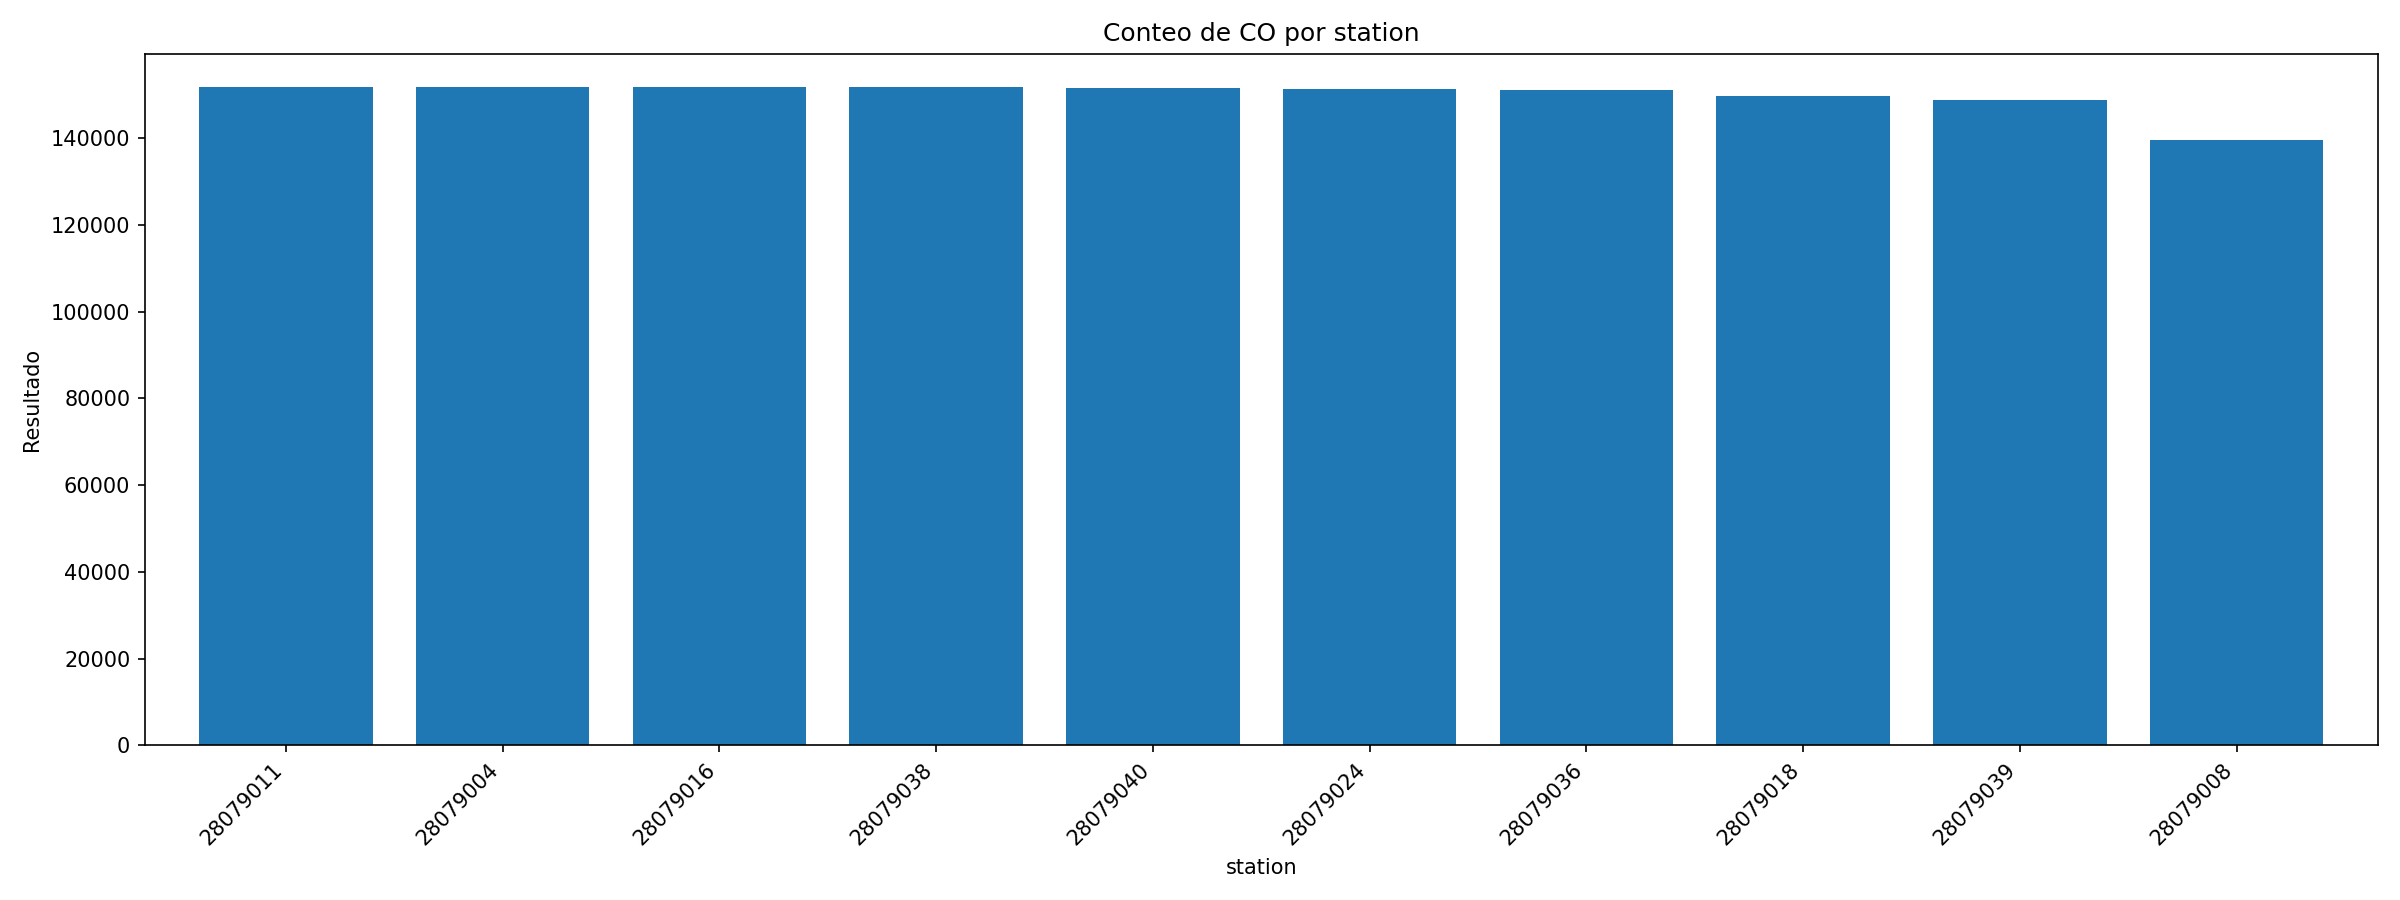

c:\Users\ainoa\OneDrive\Desktop\ADM-II-Julio\framework\strategy\bar.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df.groupby([x_col, grupo])[y_col].agg(func).unstack(fill_value=0)



→ Barras agrupadas (Media de CO por estación y año)


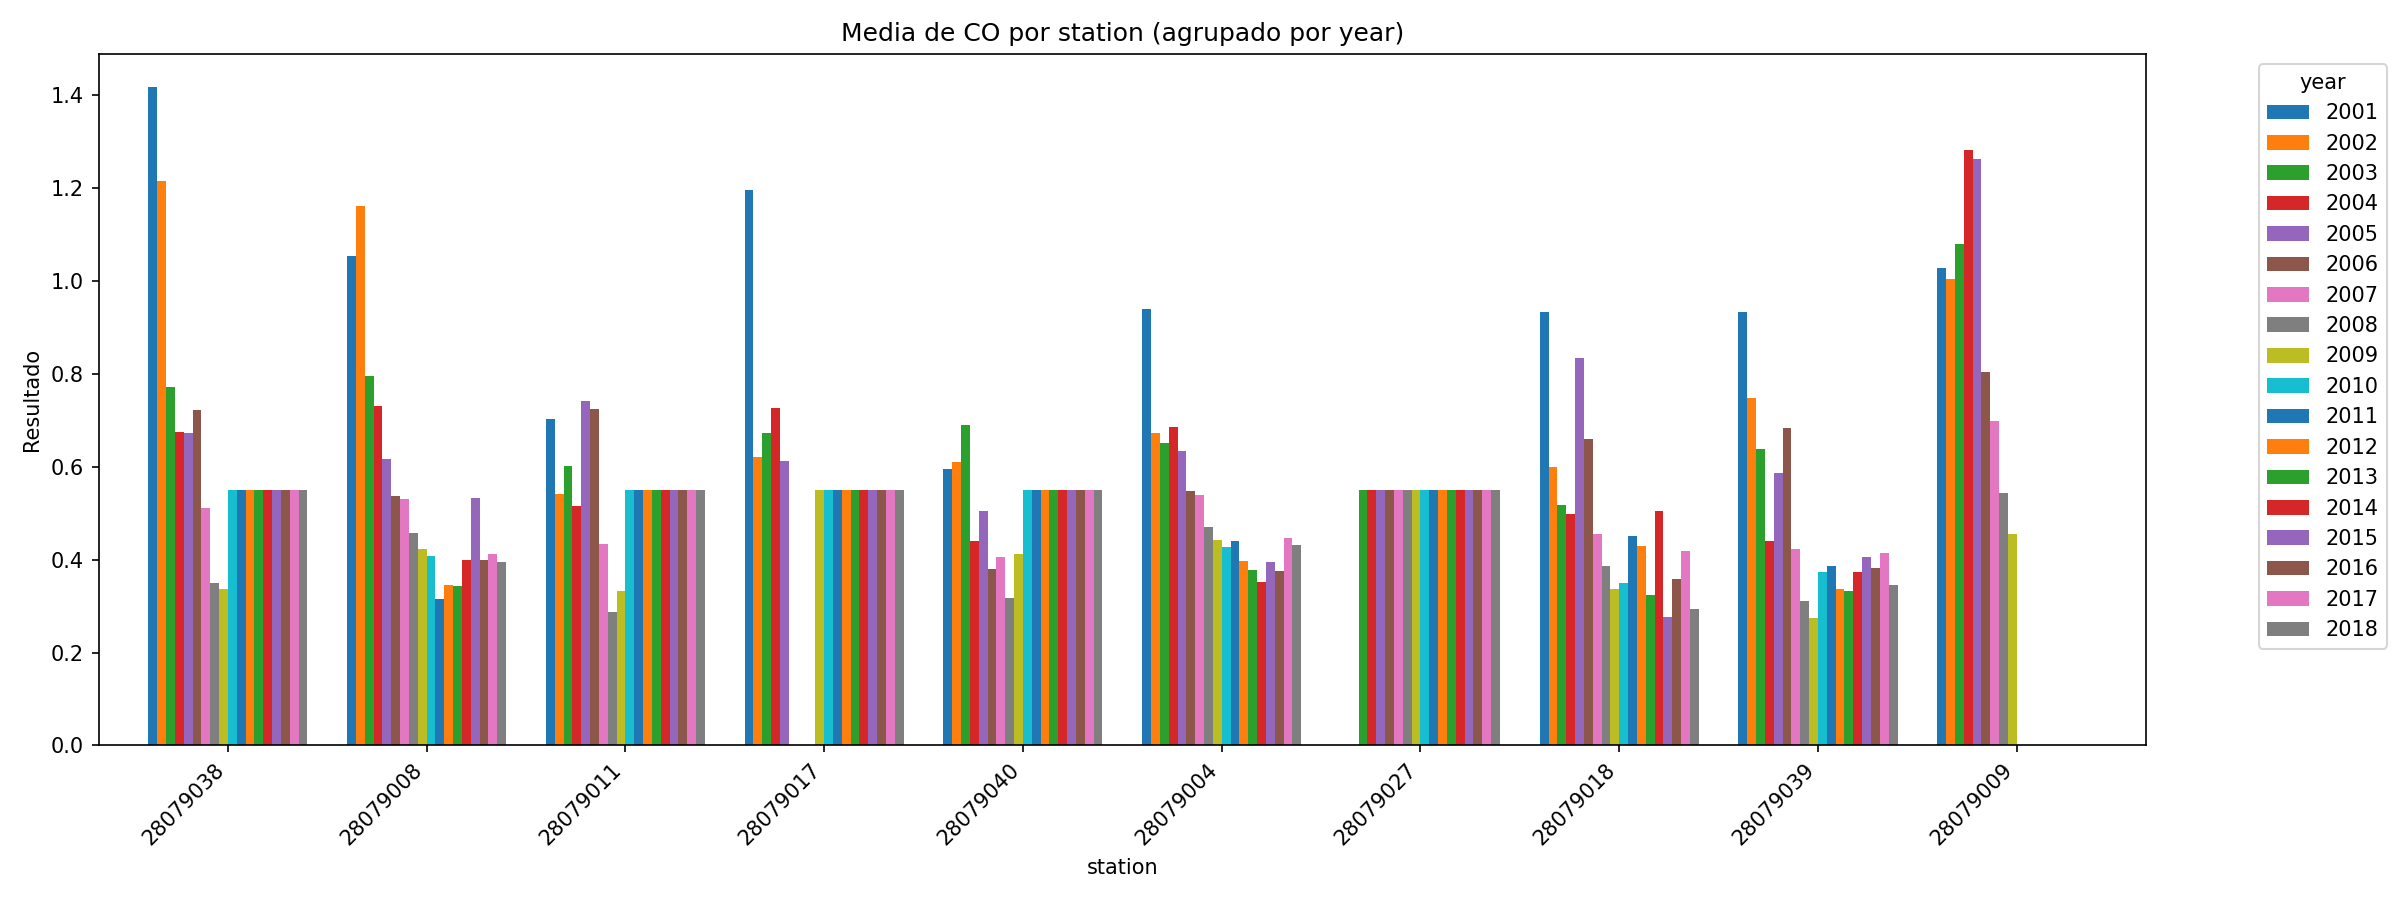

In [11]:
#----------------------------------- IPlotStrategy
#-------------------------------------------------
# 1. BARRAS
df_cleaned['year'] = df_cleaned['date'].dt.year.astype(str)

# 7) Instancio estrategia de barras
bar = BarChartStrategy()

# 8) Barras normales (conteo por estación)
img_count = bar.plot(
    df_cleaned,
    x_col='station',
    y_col='CO',       # ignorado en 'Conteo'
    agregacion='Conteo'
)
print("\n→ Barras (Conteo por estación)")
display(Image(data=img_count))

# 9) Barras agrupadas (media de CO por estación y año)
img_grouped = bar.plot(
    df_cleaned,
    x_col='station',
    y_col='CO',
    agregacion='Media',
    grupo='year'
)
print("\n→ Barras agrupadas (Media de CO por estación y año)")
display(Image(data=img_grouped))


→ Línea (Media de PM10 por año)


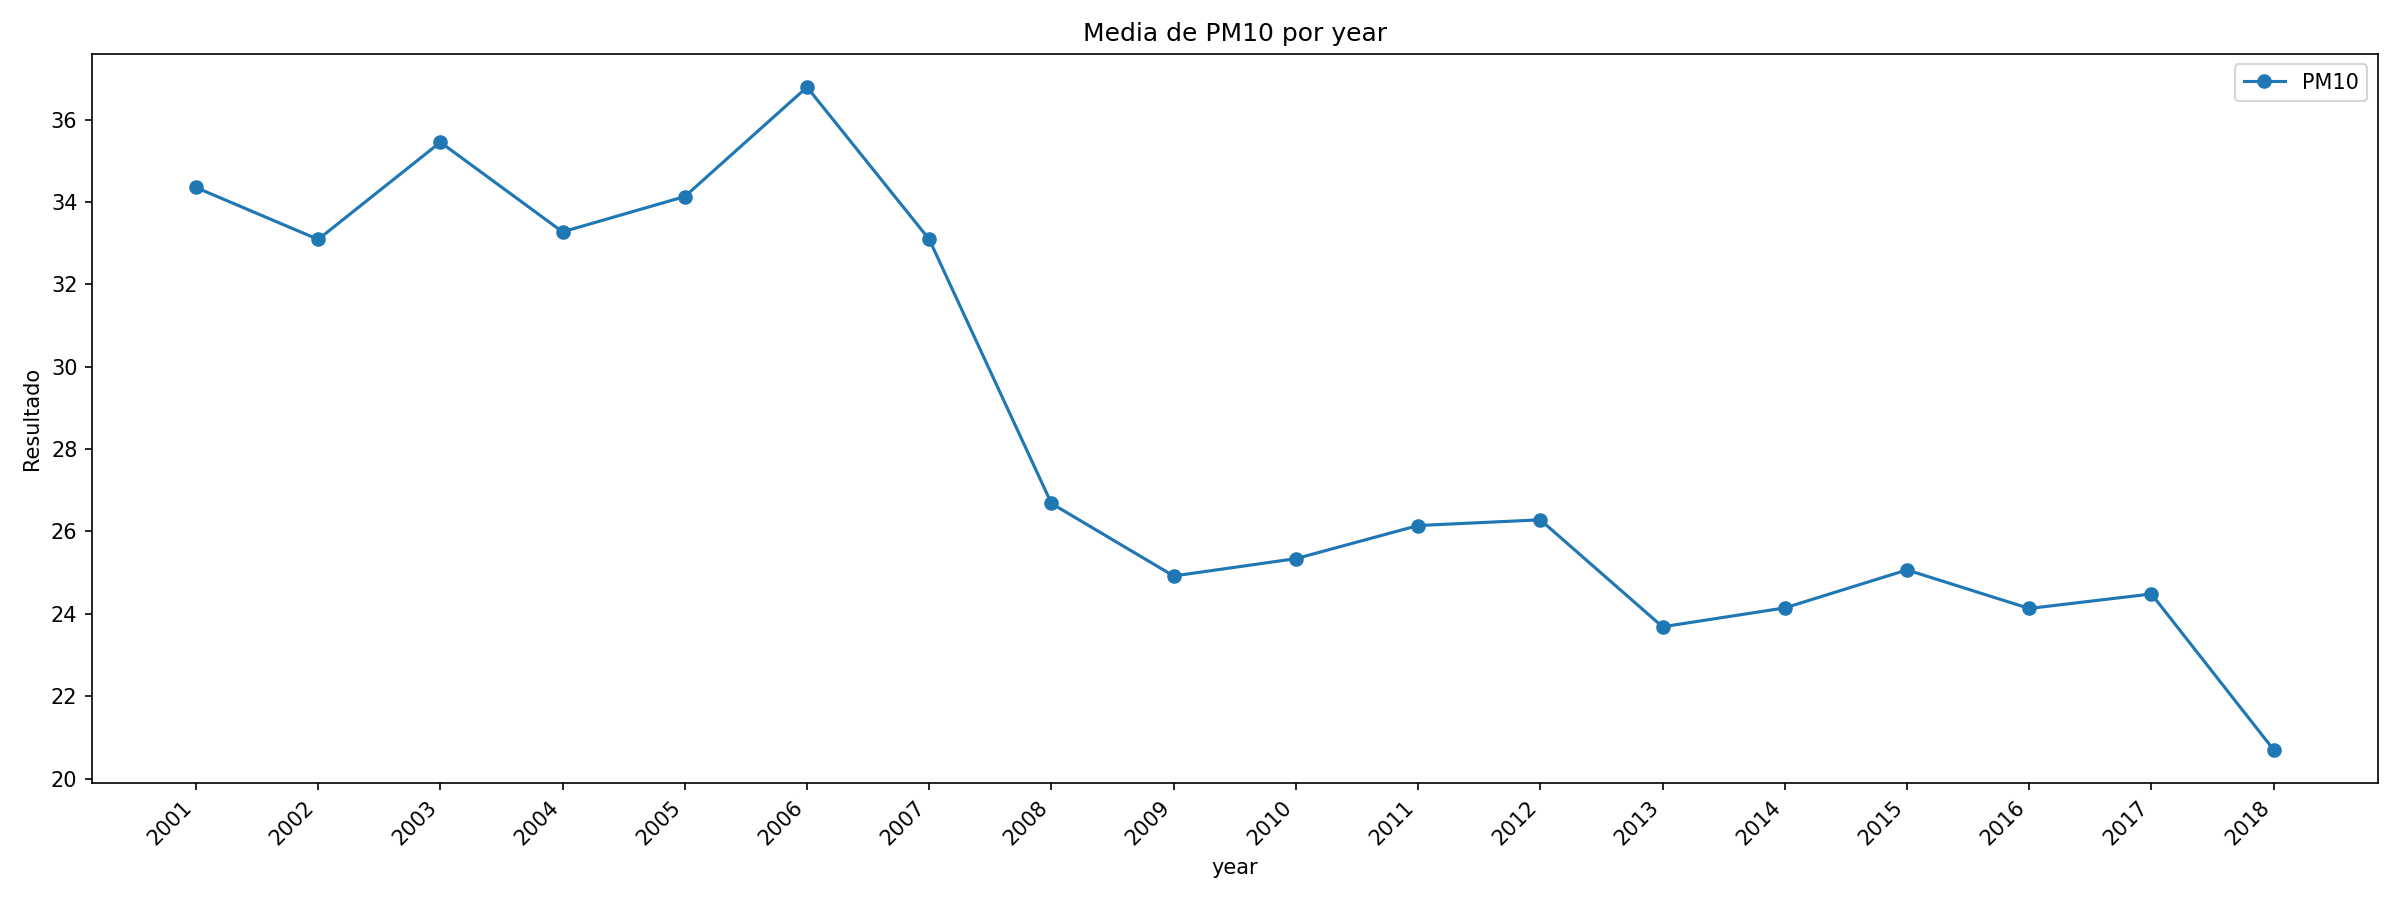

c:\Users\ainoa\OneDrive\Desktop\ADM-II-Julio\framework\strategy\line.py:31: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


→ Líneas agrupadas (Media de PM10 por año y estación)


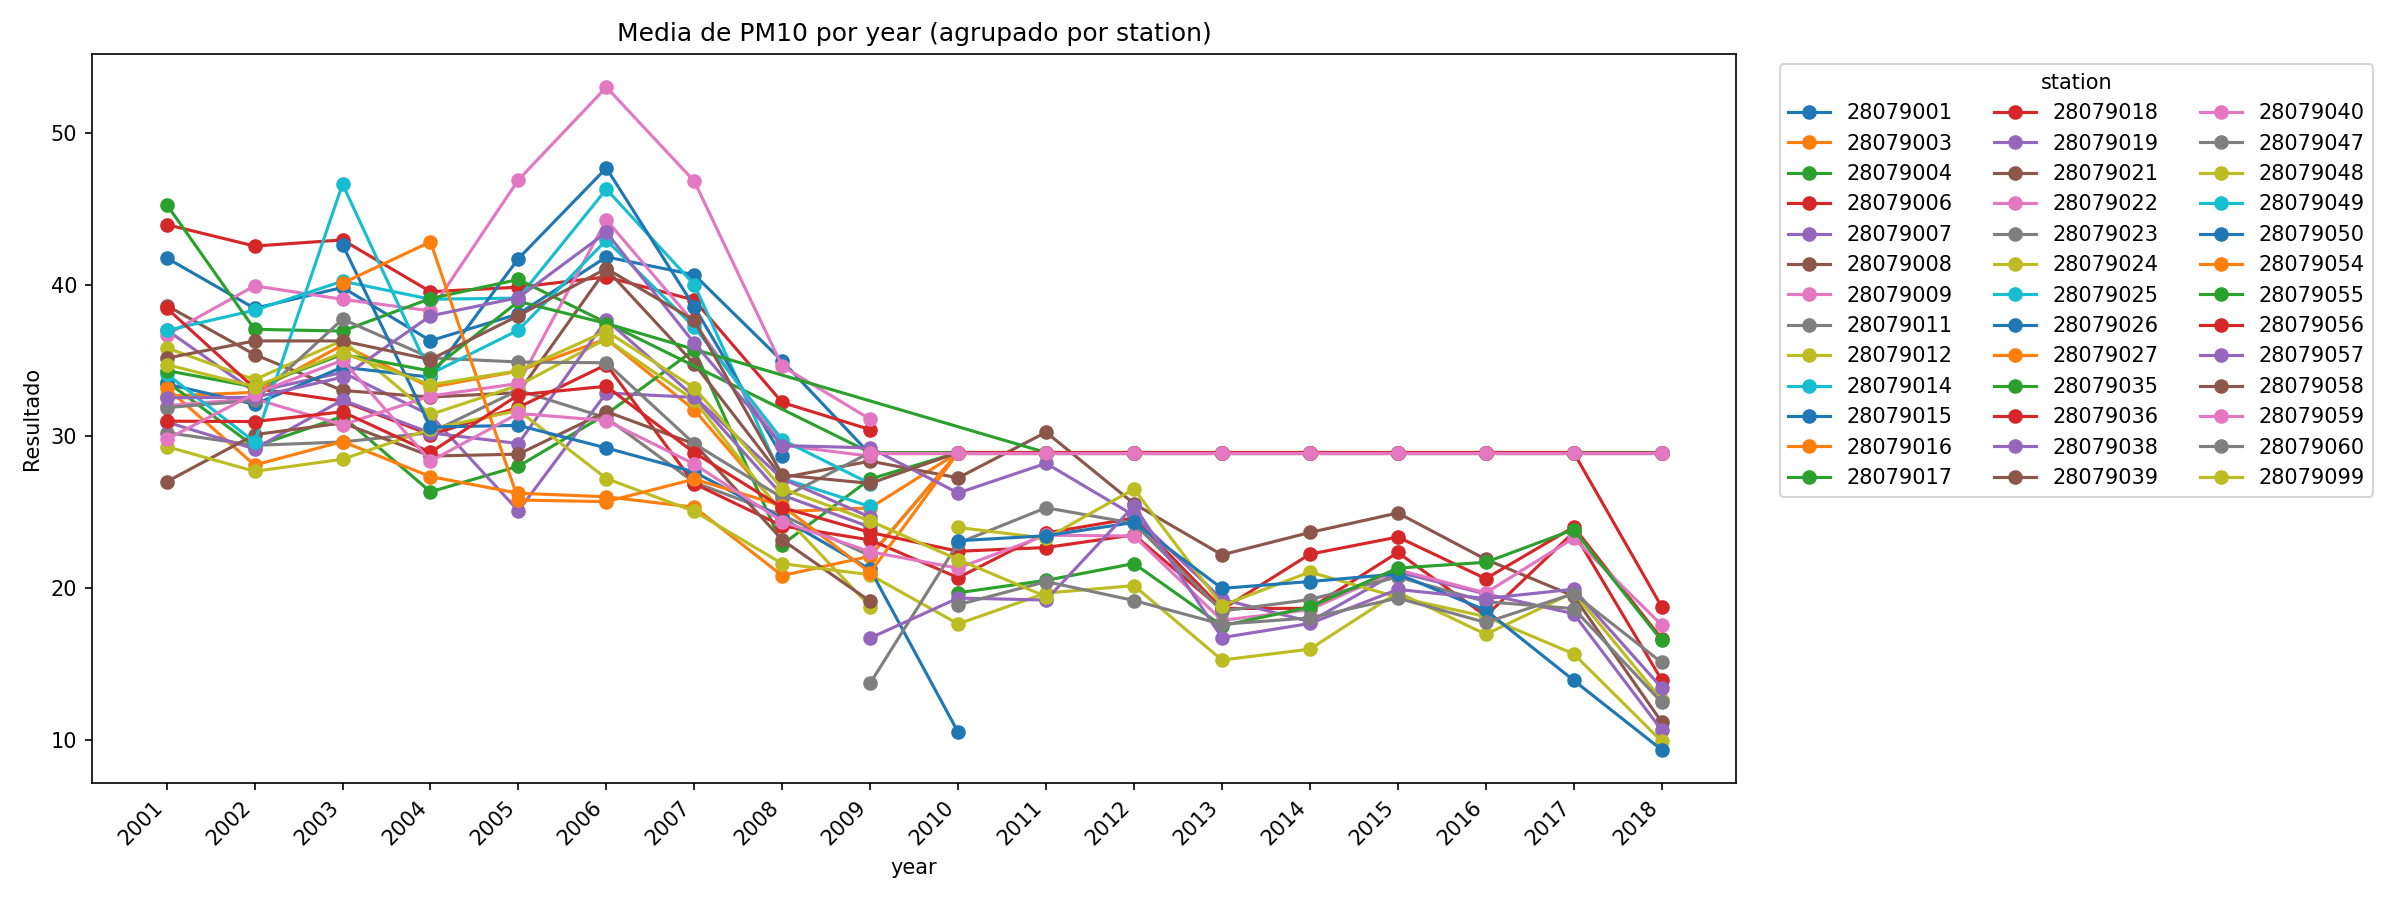

In [12]:
#----------------------------------- IPlotStrategy
#-------------------------------------------------
# 2. LINEAS Y LINEAS AGRUPADAS
df_cleaned['year'] = df_cleaned['date'].dt.year.astype(str)
line = LineChartStrategy()

# 4) Línea simple: media de PM10 por año
img_line = line.plot(
    df_cleaned,
    x_col='year',
    y_col='PM10',
    agregacion='Media'
)
print("→ Línea (Media de PM10 por año)")
display(Image(data=img_line))

# 5) Líneas agrupadas: media de PM10 por año, por estación
img_line_grp = line.plot(
    df_cleaned,
    x_col='year',
    y_col='PM10',
    agregacion='Media',
    grupo='station'
)
print("→ Líneas agrupadas (Media de PM10 por año y estación)")
display(Image(data=img_line_grp))

→ Histograma de CO


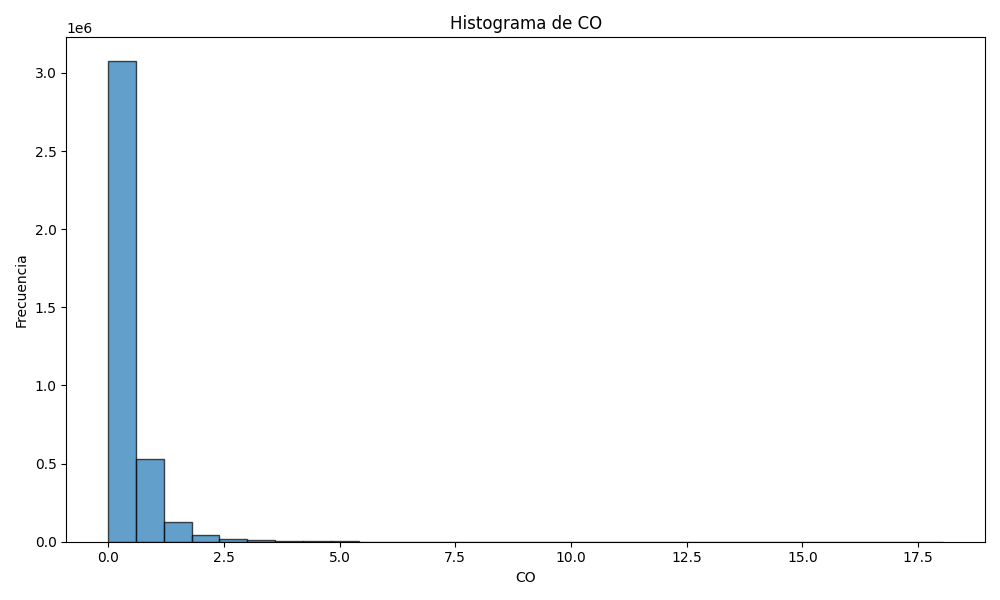

In [13]:
#----------------------------------- IPlotStrategy
#-------------------------------------------------
# 3. HISTOGRAMA
hist = HistogramStrategy()
img_hist = hist.plot(df_cleaned, y_col='CO')
print("→ Histograma de CO")
display(Image(data=img_hist))


→ Scatter CO vs NO (sin agrupación)


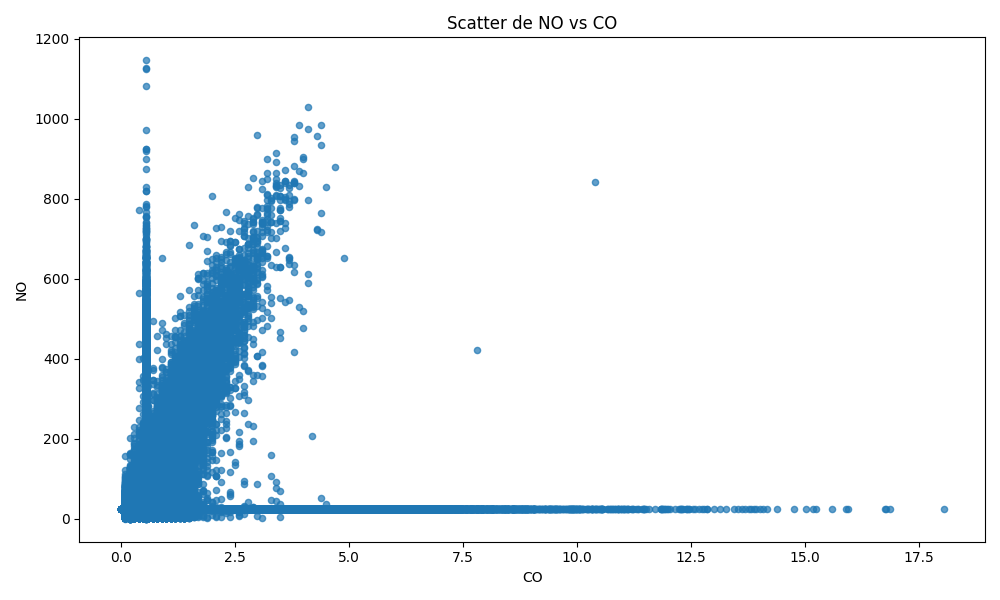

In [14]:
#----------------------------------- IPlotStrategy
#-------------------------------------------------
# 6. SCATTER
scat = ScatterStrategy()
img_scat = scat.plot(df_cleaned, x_col='CO', y_col='NO')
print("\n→ Scatter CO vs NO (sin agrupación)")
display(Image(data=img_scat))

c:\Users\ainoa\OneDrive\Desktop\ADM-II-Julio\framework\strategy\scatter.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, sub in df.groupby(grupo):



→ Scatter CO vs NO agrupado por estación


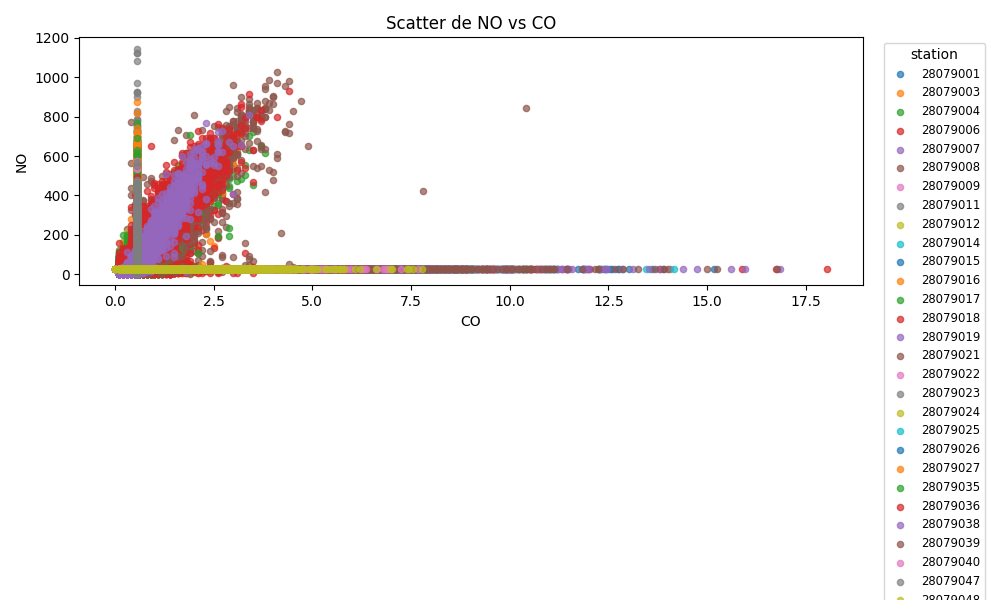

In [15]:
# Scatter agrupado por estación (ejemplo) ---
img_scat_grp = scat.plot(df_cleaned, x_col='CO', y_col='NO', grupo='station')
print("\n→ Scatter CO vs NO agrupado por estación")
display(Image(data=img_scat_grp))


→ Boxplot de CO


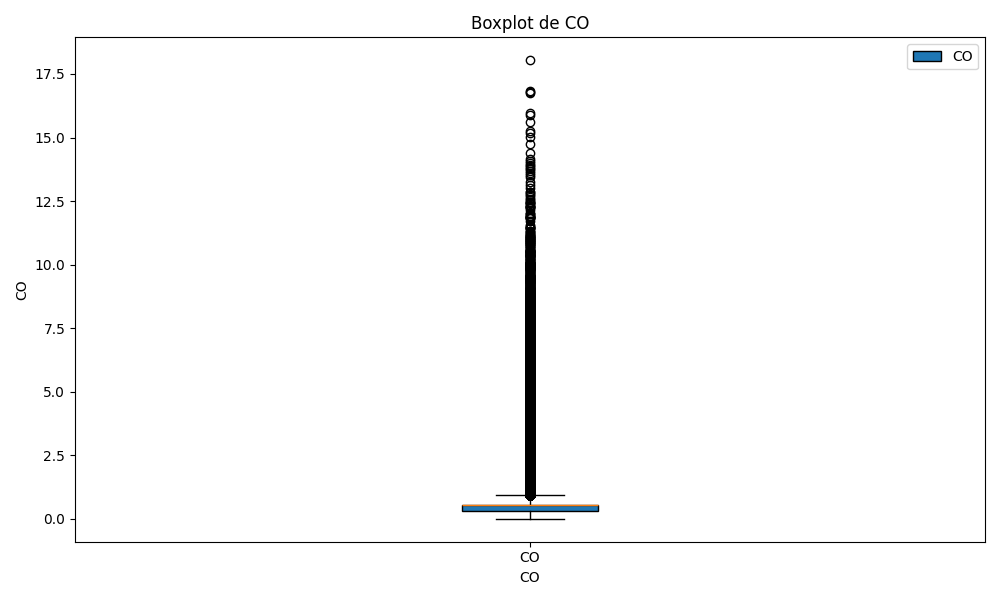

In [16]:
#----------------------------------- IPlotStrategy
#-------------------------------------------------
# 4. BOXPLOT
box = BoxplotStrategy()
img_box = box.plot(df_cleaned, y_col='CO')
print("\n→ Boxplot de CO")
display(Image(data=img_box))


→ Correlograma


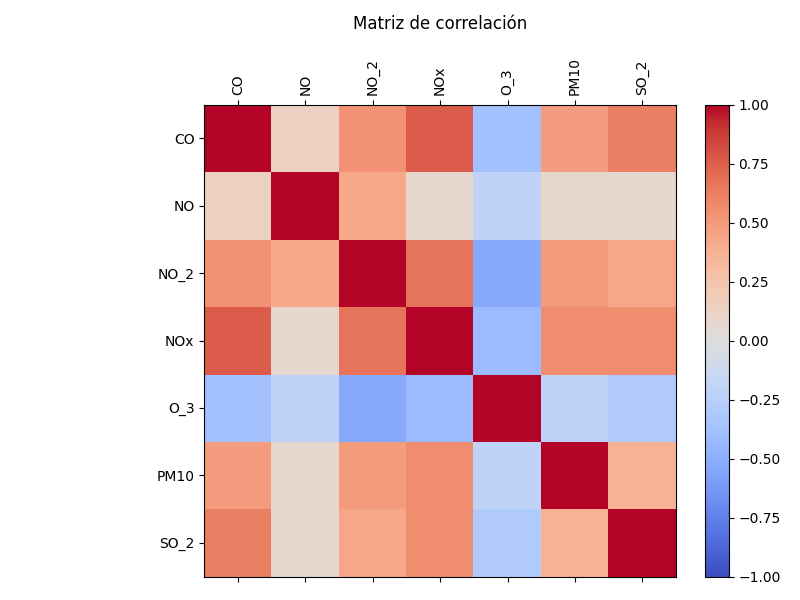

In [17]:
#----------------------------------- IPlotStrategy
#-------------------------------------------------
# 5. CORRELOGRAMA
corr = CorrelogramaStrategy()
img_corr = corr.plot(df_cleaned)
print("\n→ Correlograma")
display(Image(data=img_corr))

In [18]:
#----------------- PRUEBAS CON OTRO DATSET - ACCIDENTES DE TRAFICO
DATA_PATH_accidents = "datasets/US_Accidents_March23.csv"
source_accidents = CSVDataSource(DATA_PATH_accidents)
df_accidents = source_accidents.load()

cleaner_default_accidents = Cleaner()
df_accidents_cleaned = cleaner_default.clean(df_accidents)
print("\nDefault Cleaner -> shape:", df_accidents_cleaned.shape)
print("Log (primeras 5 entradas):")
for line in df_accidents_cleaned.attrs["cleaning_log"][:100]:
    print(" -", line)



Default Cleaner -> shape: (7728394, 44)
Log (primeras 5 entradas):
 - Eliminadas 2 columnas vacías o constantes.
 - 'End_Lat' imputada con media.
 - 'End_Lng' imputada con media.
 - 'Description' imputada con 'Desconocido'.
 - 'Street' imputada con 'Desconocido'.
 - 'City' imputada con 'Desconocido'.
 - 'Zipcode' imputada con 'Desconocido'.
 - 'Timezone' imputada con 'Desconocido'.
 - 'Airport_Code' imputada con 'Desconocido'.
 - 'Weather_Timestamp' imputada con 'Desconocido'.
 - 'Temperature(F)' imputada con media.
 - 'Wind_Chill(F)' imputada con media.
 - 'Humidity(%)' imputada con media.
 - 'Pressure(in)' imputada con media.
 - 'Visibility(mi)' imputada con media.
 - 'Wind_Direction' imputada con 'Desconocido'.
 - 'Wind_Speed(mph)' imputada con media.
 - 'Precipitation(in)' imputada con media.
 - 'Weather_Condition' imputada con 'Desconocido'.
 - 'Sunrise_Sunset' imputada con 'Desconocido'.
 - 'Civil_Twilight' imputada con 'Desconocido'.
 - 'Nautical_Twilight' imputada con 'Descono

In [19]:
# Inspección rápida con el processor
processor = DataProcessor()
print("➜ Shape:", processor.get_shape(df_accidents_cleaned))
print("➜ Columnas:", processor.get_columns(df_accidents_cleaned))
print("➜ Tipos de dato:")
for col, dt in processor.get_dtypes(df_accidents_cleaned).items():
    print(f"    {col:<25} {dt}")

➜ Shape: (7728394, 44)
➜ Columnas: ['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
➜ Tipos de dato:
    ID                        object
    Source                    object
    Severity                  int64
    Start_Time                object
    End_Time                  object
    Start_Lat                 float64
    Start_Lng                 float64
    End_Lat                   float64
    End_Lng                

→ Distribución de la temperatura


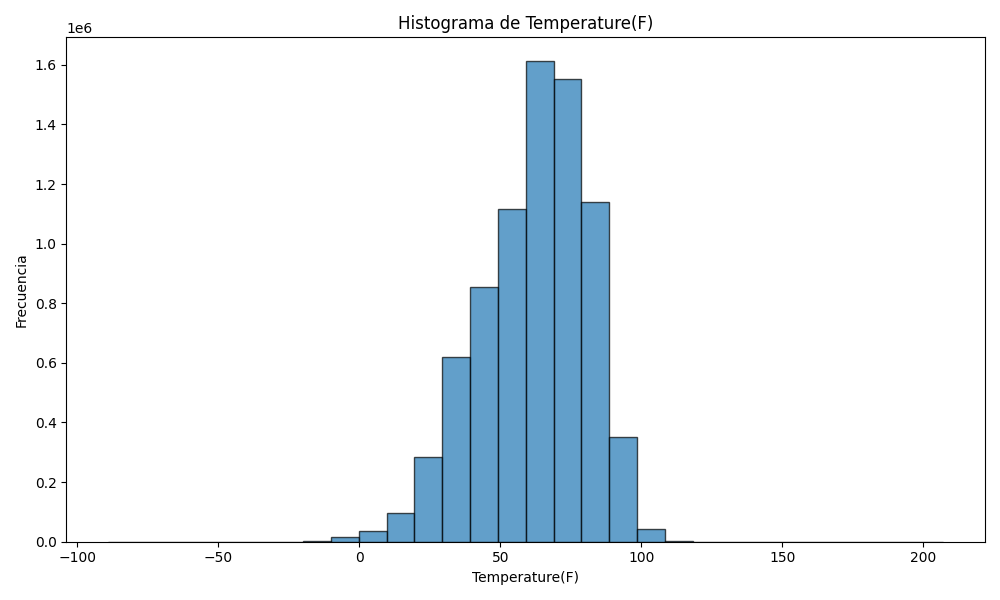

In [20]:
hist = HistogramStrategy()
img_temp = hist.plot(
    df_accidents_cleaned,
    y_col='Temperature(F)'
)
print("→ Distribución de la temperatura")
display(Image(data=img_temp))


→ Accidentes por Estado (Top-10)


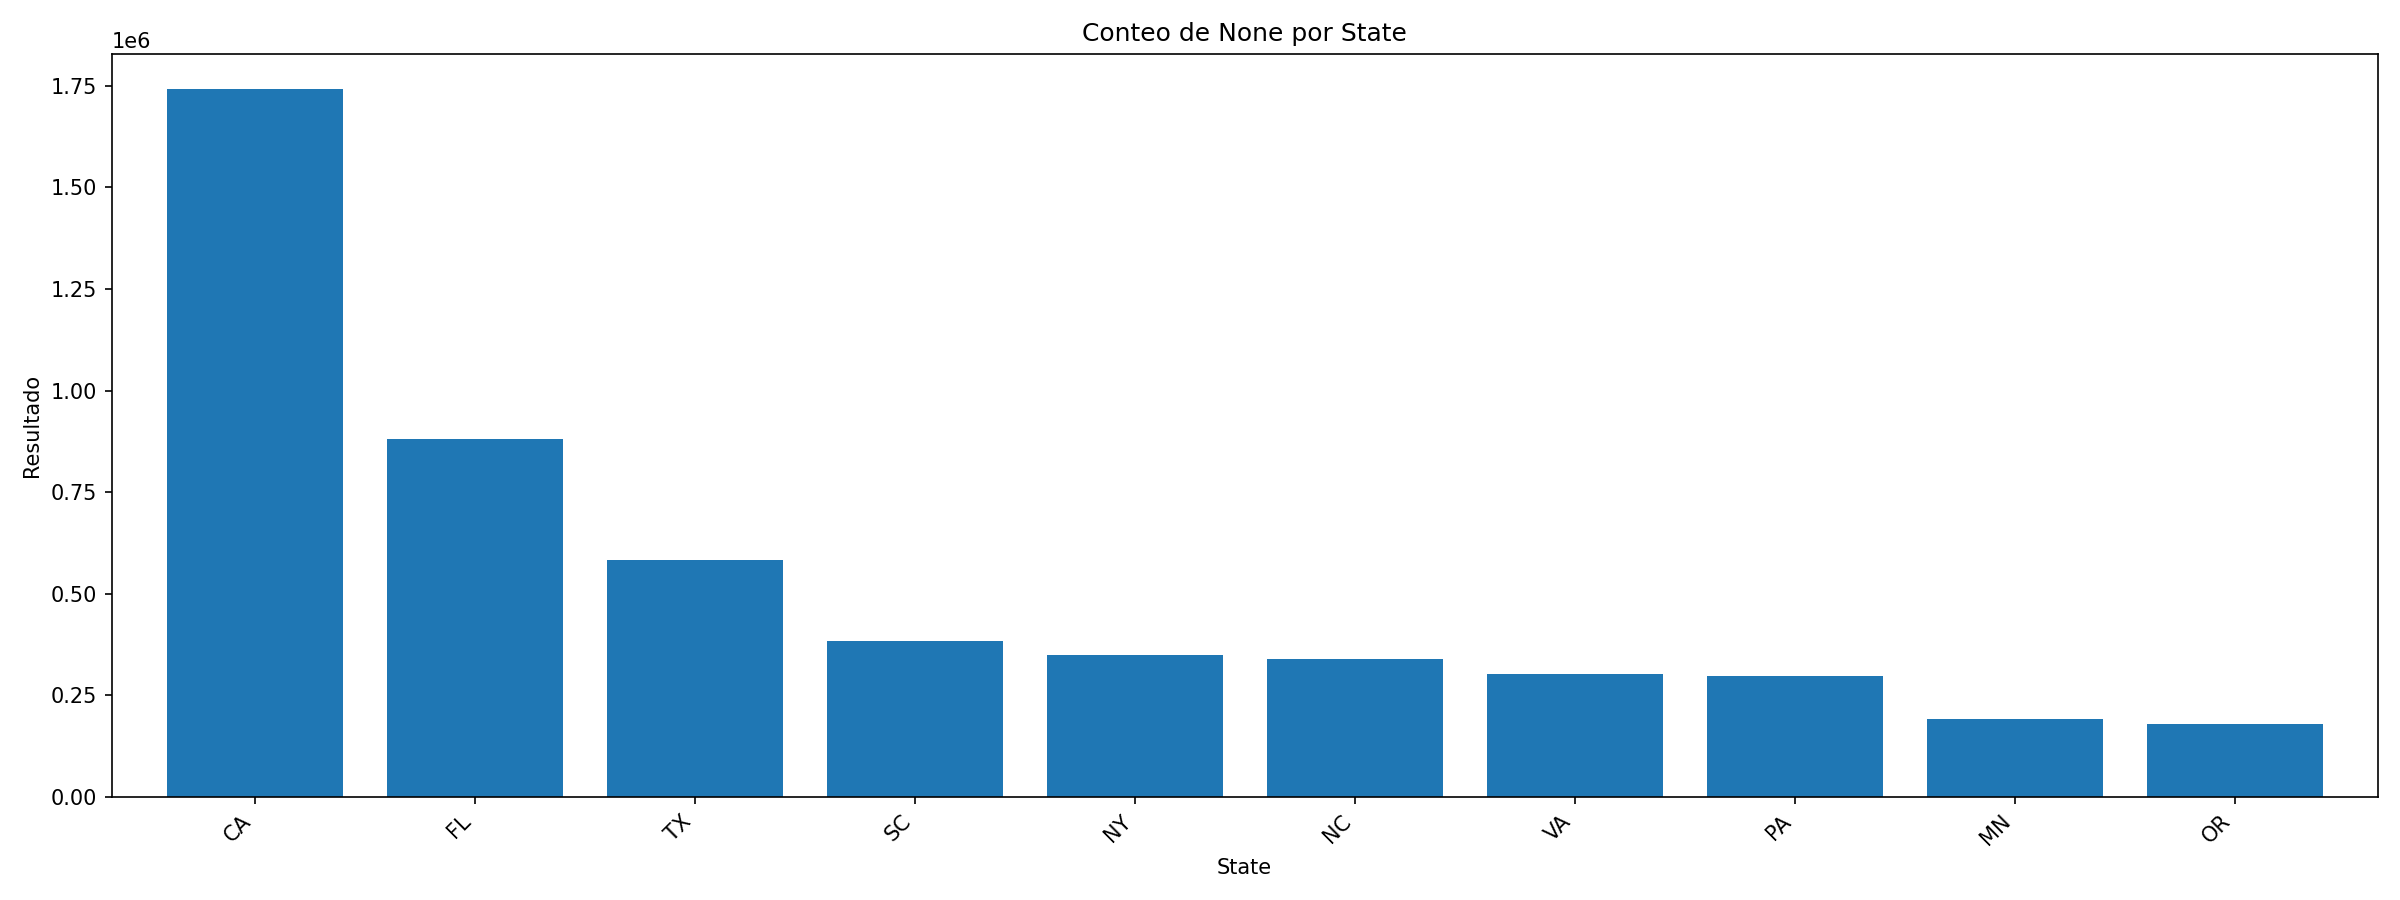

In [21]:
# Cell X: Accidentes por Estado (Top-10)
# ------------------------------------------------
# Agrupo por 'State' y cuento registros
bar = BarChartStrategy()
img = bar.plot(
    df_accidents_cleaned,
    x_col='State',
    y_col=None,          # ignorado en "Conteo"
    agregacion='Conteo'
)
print("→ Accidentes por Estado (Top-10)")
display(Image(data=img))


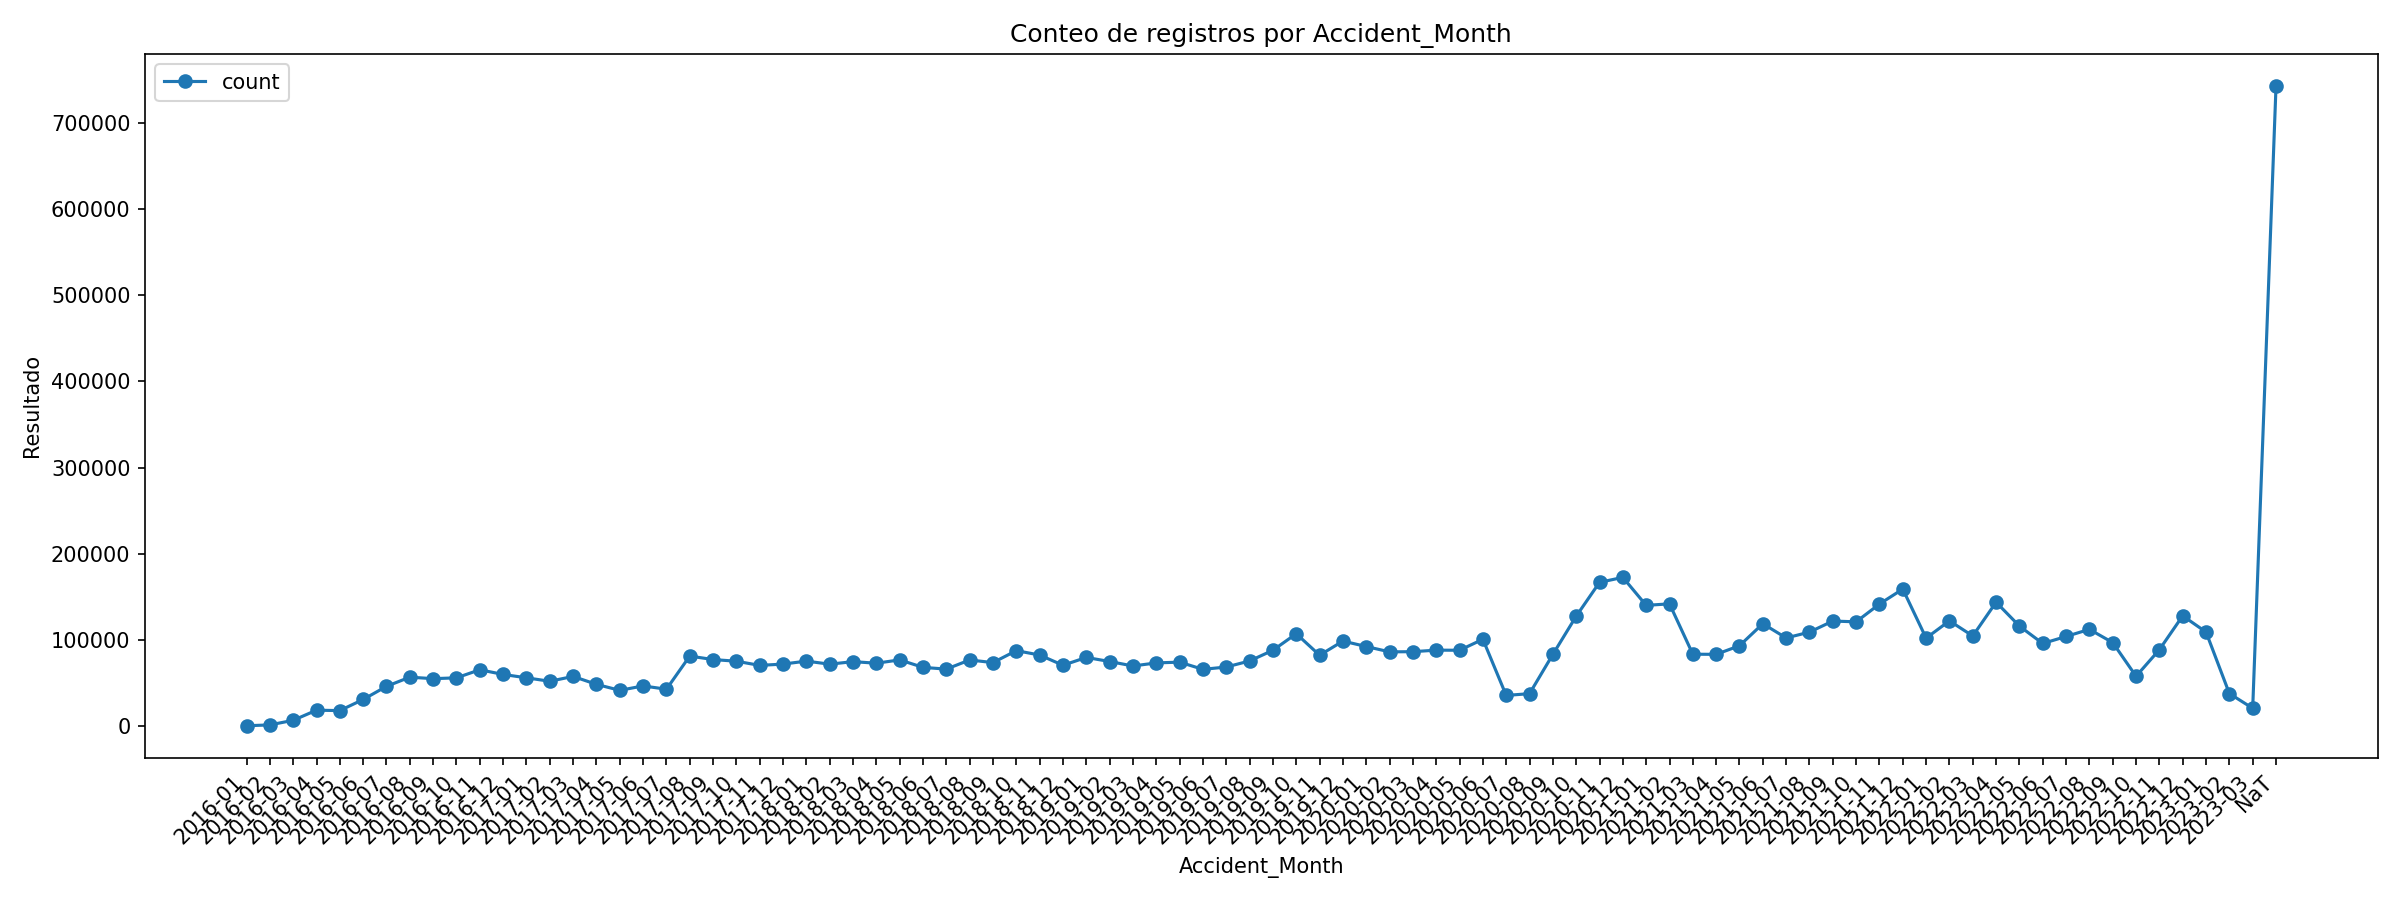

In [22]:
# Convierte Start_Time a datetime (si no lo has hecho aún)
df_accidents_cleaned['Start_Time'] = pd.to_datetime(
    df_accidents_cleaned['Start_Time'],
    errors='coerce'
)

# Crea la columna 'Accident_Month' como periodo mensual
df_accidents_cleaned['Accident_Month'] = (
    df_accidents_cleaned['Start_Time']
      .dt.to_period('M')
      .astype(str)
)

# Trazamos con la estrategia de líneas
from framework.strategy.line import LineChartStrategy
line = LineChartStrategy()

img = line.plot(
    df_accidents_cleaned,
    x_col='Accident_Month',
    y_col=None,         # ignorado en Conteo
    agregacion='Conteo'
)
display(Image(data=img))


→ Scatter Temperatura vs Humedad (por Severity)


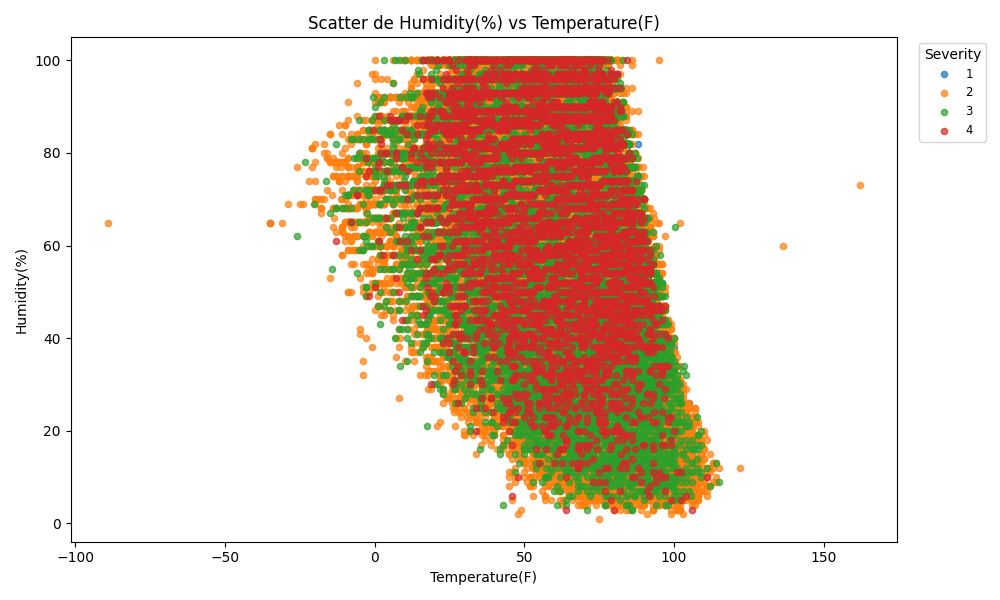

In [23]:
# Cell X+4: Scatter Temperatura vs Humedad, agrupado por Severidad
# ------------------------------------------------
# Solo tomo un muestreo para no saturar el gráfico
sample = df_accidents_cleaned.sample(200_000, random_state=42)

scatter = ScatterStrategy()
img = scatter.plot(
    sample,
    x_col='Temperature(F)',
    y_col='Humidity(%)',
    grupo='Severity'
)
print("→ Scatter Temperatura vs Humedad (por Severity)")
display(Image(data=img))


→ Mapa de correlaciones


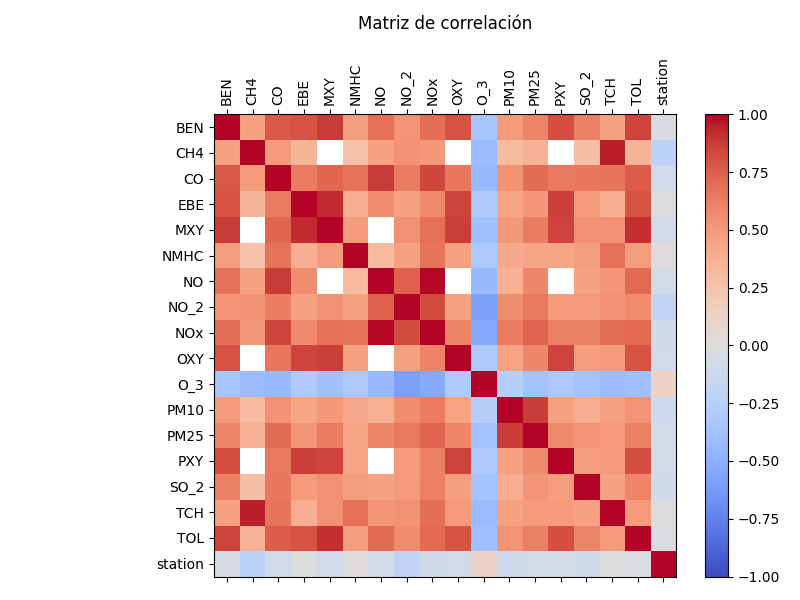

In [24]:
# Cell X+3: Correlograma de variables numéricas
# ------------------------------------------------
corr = CorrelogramaStrategy()
img = corr.plot(df)
print("→ Mapa de correlaciones")
display(Image(data=img))
